# Семинар 11: Предобработка данных

In [134]:
import numpy as np
import pandas as pd
import random
import seaborn as sns

## Загрузка данных.

In [135]:
df = pd.read_csv('train.csv')
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


Описание датасета

Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры

## Размер датасета.

In [136]:
print('Количество строк:', df.shape[0])

Количество строк: 10000


In [137]:
df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

Отделяем целевую переменную (цена на квартиру).

In [138]:
target = "Price"

y = df[target]
X = df.drop(target, axis=1)
X.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B


## Изучим состав признаков X.

Числовые признаки:

In [139]:
X.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


Категориальные признаки:

In [140]:
X.select_dtypes(include='object').columns.tolist()

['Ecology_2', 'Ecology_3', 'Shops_2']

In [141]:
X['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

Сделаем из этого признака два 'Ecology_2_A' и 'Ecology_2_B':

In [142]:
pd.get_dummies(X['Ecology_2']).head()

,A,B
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [143]:
encoded_Ecology_2 = pd.get_dummies(X['Ecology_2']).rename(columns={'A': 'Ecology_2_A', 'B': 'Ecology_2_B'})
X = X.join(encoded_Ecology_2).drop('Ecology_2', axis=1)
X.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_A,Ecology_2_B
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,11,3097,0,NaN,0,0,B,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,30,6207,1,1183.0,1,0,B,0,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,33,5261,0,240.0,3,1,B,0,1
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,1,264,0,NaN,0,1,B,0,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,33,8667,2,NaN,0,6,B,0,1


Аналогично создадим dummy-переменные для `Ecology_3`

In [144]:
X['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [145]:
encoded_Ecology_3 = pd.get_dummies(X['Ecology_3']).rename(columns={'A': 'Ecology_3_A', 'B': 'Ecology_3_B'})
X = X.join(encoded_Ecology_3).drop('Ecology_3', axis=1)
X.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,3097,0,NaN,0,0,B,0,1,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,6207,1,1183.0,1,0,B,0,1,0,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,5261,0,240.0,3,1,B,0,1,0,1
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,264,0,NaN,0,1,B,0,1,0,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,8667,2,NaN,0,6,B,0,1,0,1


Аналогично создадим dummy-переменные для `Shops_2`

In [146]:
X['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [147]:
encoded_Shops_2 = pd.get_dummies(X['Shops_2']).rename(columns={'A': 'Shops_2_A', 'B': 'Shops_2_B'})
X = X.join(encoded_Shops_2).drop('Shops_2', axis=1)
X.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,...,0,NaN,0,0,0,1,0,1,0,1
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,1183.0,1,0,0,1,0,1,0,1
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,0,240.0,3,1,0,1,0,1,0,1
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,...,0,NaN,0,1,0,1,0,1,0,1
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,2,NaN,0,6,0,1,0,1,0,1


## Заполнение пропущенных значений

Определим, какие "столбцы" имеют пропущенные значения, если столбец содержит пустые элементы или элементы NaN, это True, иначе False

In [148]:
X.isna().any()

Id               False
DistrictId       False
Rooms            False
Square           False
LifeSquare        True
KitchenSquare    False
Floor            False
HouseFloor       False
HouseYear        False
Ecology_1        False
Social_1         False
Social_2         False
Social_3         False
Healthcare_1      True
Helthcare_2      False
Shops_1          False
Ecology_2_A      False
Ecology_2_B      False
Ecology_3_A      False
Ecology_3_B      False
Shops_2_A        False
Shops_2_B        False
dtype: bool

Только два столбца `LifeSquare` и `Healthcare_1`

Количество NaN в столбце признака LifeSquare, признака Healthcare_1:

In [149]:
X[X['LifeSquare'].isna()].shape[0], X[X['Healthcare_1'].isna()].shape[0]

(2113, 4798)

In [150]:
X['Healthcare_1'].value_counts()

540.0     511
30.0      348
1046.0    245
750.0     163
229.0     148
         ... 
370.0      14
32.0       12
1815.0     10
35.0        2
0.0         1
Name: Healthcare_1, Length: 79, dtype: int64

Заменим самым частым значением все отсутствующие данные в поле Healthcare_1 (замену пропусков делаем при помощи метода ".fillna()" ):

In [151]:
X['Healthcare_1']=X['Healthcare_1'].fillna(X['Healthcare_1'].mean())

Проверка (вычислим теперь количество пропусков в поле Healthcare_1):

In [152]:
X[X['Healthcare_1'].isna()].shape[0]

0

Пропуски в LifeSquare заменим на разность значений общей площади и площади кухни:

In [153]:
X['LifeSquare']=X['LifeSquare'].fillna(X['Square']-X['KitchenSquare'])

In [154]:
X[X['LifeSquare'].isna()].shape[0]

0

Проверка (вычислим теперь количество пропусков в поле LifeSquare):

## Обработка выбросов
Что можно делать с ними?

- Выкинуть эти данные
- Заменять выбросы разными методами (медианы, средние значения и т.д.) 
- Делать/не делать дополнительный признак
- Ничего не делать

Разберёмся с выбросами для признака:

#### Rooms

In [155]:
X['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Создаем новый признак 'Rooms_outlier', равный по умолчанию нулю, но в случае выбросов присваеваем ему значение 1.

In [156]:
X['Rooms_outlier'] = 0
X.loc[(X['Rooms'] == 0) | (X['Rooms'] >= 6), 'Rooms_outlier'] = 1
X['Rooms_outlier'].value_counts()

0    9988
1      12
Name: Rooms_outlier, dtype: int64

Если число комнат равно нулю, то полагаем, что оно равно 1, если больше 6 заменяем медианой.

In [157]:
X.loc[X['Rooms'] == 0, 'Rooms'] = 1
X.loc[(X['Rooms'] >= 6), 'Rooms'] = X['Rooms'].median()

In [158]:
X['Rooms'].value_counts()

2.0    3884
1.0    3713
3.0    2235
4.0     150
5.0      18
Name: Rooms, dtype: int64

#### KitchenSquare

In [159]:
X['KitchenSquare'].value_counts()

1.0       2460
8.0       1306
5.0       1169
10.0      1075
6.0       1038
9.0        843
0.0        697
7.0        609
12.0       249
11.0       233
13.0        67
14.0        51
4.0         39
15.0        31
3.0         22
16.0        16
20.0        14
17.0        12
19.0        11
18.0         6
2.0          4
22.0         3
43.0         2
112.0        2
41.0         2
32.0         2
58.0         2
25.0         2
37.0         2
30.0         2
51.0         2
40.0         1
96.0         1
48.0         1
72.0         1
73.0         1
2014.0       1
66.0         1
36.0         1
78.0         1
54.0         1
29.0         1
31.0         1
35.0         1
62.0         1
39.0         1
1970.0       1
60.0         1
75.0         1
26.0         1
21.0         1
84.0         1
63.0         1
123.0        1
53.0         1
42.0         1
23.0         1
27.0         1
Name: KitchenSquare, dtype: int64

 Находим выбросы

In [160]:
X['KitchenSquare'].quantile(.975), X['KitchenSquare'].quantile(.1)

(13.0, 1.0)

In [161]:
condition = (X['KitchenSquare'].isna()) \
             | (X['KitchenSquare'] > X['KitchenSquare'].quantile(.975))
        
X.loc[condition, 'KitchenSquare'] = X['KitchenSquare'].median()

X.loc[X['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [162]:
X['KitchenSquare'].value_counts()

3.0     3183
8.0     1306
6.0     1227
5.0     1169
10.0    1075
9.0      843
7.0      609
12.0     249
11.0     233
13.0      67
4.0       39
Name: KitchenSquare, dtype: int64

#### HouseFloor, Floor

Находим уникальные номера этажей

In [163]:
X['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42])

 Находим число этажей в домах

In [164]:
X['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,  99., 117.])

 Число случаев, в которых этаж квартиры больше этажности дома:

In [165]:
(X['Floor'] > X['HouseFloor']).sum()

1825

Создаем признак 'HouseFloor_outlier'(если этаж меньше этажности дома, то 0, а если больше, то - 1 и если 0 этажей в доме, то тоже 1)

In [166]:
X['HouseFloor_outlier'] = 0
X.loc[X['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor_outlier'] = 1

Заменяем невалидные значения этажей

In [167]:
X.loc[X['HouseFloor'] == 0, 'HouseFloor'] = X['HouseFloor'].median()

In [168]:
floor_outliers = X.loc[X['Floor'] > X['HouseFloor']].index
floor_outliers #индексы невалидных значений

Int64Index([  17,   19,   21,   25,   26,   33,   34,   37,   39,   44,
            ...
            9913, 9921, 9930, 9931, 9938, 9953, 9960, 9968, 9970, 9975],
           dtype='int64', length=1610)

In [169]:
X.loc[floor_outliers, 'Floor'] = X.loc[floor_outliers, 'HouseFloor']\
                                                .apply(lambda x: random.randint(1,x))

Проверяем, что число случаев, в которых этаж квартиры больше этажности дома столо нулём.

In [170]:
(X['Floor'] > X['HouseFloor']).sum()

0

 #### HouseYear

In [171]:
X['HouseYear'].sort_values(ascending=False)

9163    20052011
8828        4968
7246        2020
2350        2020
8296        2020
          ...   
7610        1916
6250        1914
2066        1912
2795        1912
6794        1910
Name: HouseYear, Length: 10000, dtype: int64

In [172]:
X.loc[X['HouseYear'] == 20052011, 'HouseYear'] = 2008

In [173]:
X.loc[X['HouseYear'] > 2020, 'HouseYear'] = 2020

In [174]:
X['HouseYear'].sort_values(ascending=False)

5412    2020
3196    2020
7721    2020
1004    2020
1077    2020
        ... 
7610    1916
6250    1914
2066    1912
2795    1912
6794    1910
Name: HouseYear, Length: 10000, dtype: int64

In [175]:
X.loc[X['Id'] == 9163, 'HouseYear']

4263    2015
Name: HouseYear, dtype: int64

In [176]:
X.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,Rooms_outlier,HouseFloor_outlier
0,11809,27,3.0,115.027311,105.027311,10.0,4,10.0,2014,0.075424,...,0,0,0,1,0,1,0,1,0,0
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,...,1,0,0,1,0,1,0,1,0,0
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,...,3,1,0,1,0,1,0,1,0,0
3,2352,1,1.0,40.409907,39.409907,3.0,10,22.0,1977,0.007122,...,0,1,0,1,0,1,0,1,0,0
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,...,0,6,0,1,0,1,0,1,0,0
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,...,2,4,0,1,0,1,0,1,0,0
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,...,0,3,0,1,0,1,0,1,0,0
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,...,5,5,0,1,0,1,0,1,0,0
8,9951,1,1.0,46.887892,44.628132,3.0,12,20.0,1977,0.007122,...,0,1,0,1,0,1,0,1,0,0
9,8094,6,3.0,79.867477,75.085125,3.0,3,17.0,2014,0.243205,...,0,0,0,1,0,1,0,1,0,0


## Найдём матрицу корреляции:

In [177]:
df=X.join(y)

In [178]:
corr_matrix=df.corr().abs()

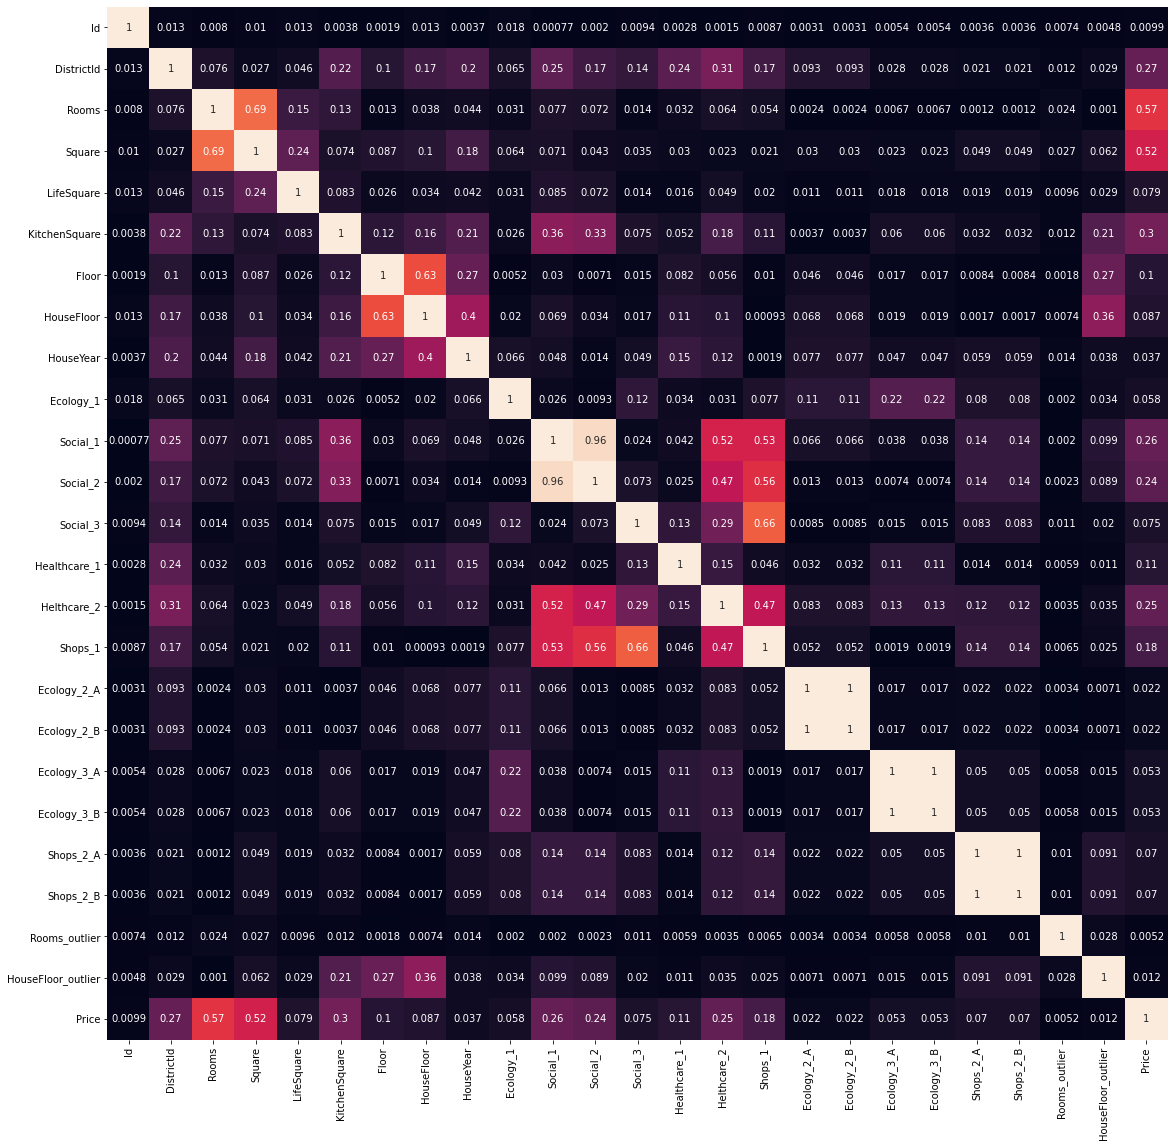

In [179]:
f=plt.figure(figsize=(19,19))
sns.heatmap(corr_matrix, annot=True, cbar= False)
plt.show()

Выберем существенные признаки:

In [180]:
features = ['Rooms', 'Square', 'KitchenSquare','Floor', 'HouseFloor', 'HouseYear', 'Ecology_1','Social_1','Social_2','Shops_1','Healthcare_1', 'Helthcare_2']
X_preprocessing=X[features]
X_preprocessing.head()

,Rooms,Square,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Shops_1,Healthcare_1,Helthcare_2
0,3.0,115.027311,10.0,4,10.0,2014,0.075424,11,3097,0,1142.90446,0
1,1.0,39.832524,8.0,7,8.0,1966,0.118537,30,6207,0,1183.00000,1
2,3.0,78.342215,10.0,2,17.0,1988,0.025609,33,5261,1,240.00000,3
3,1.0,40.409907,3.0,10,22.0,1977,0.007122,1,264,1,1142.90446,0
4,2.0,64.285067,9.0,16,16.0,1972,0.282798,33,8667,6,1142.90446,0
